##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# O básico: treinando seu primeiro modelo

<table class="tfo-notebook-buttons" align="left">
 <td>
 <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https:// www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
 </td>
 <td>
 <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/ images/GitHub-Mark-32px.png" />Ver fonte no GitHub</a>
 </td>
</tabela>

Bem-vindo a este lab onde você treinará seu primeiro modelo de Machine Learning!

Tentaremos manter as coisas simples aqui e introduzir apenas conceitos básicos. Posteriormente, o lab cobrirá problemas mais avançados.

O problema que resolveremos é converter de Celsius para Fahrenheit, onde a fórmula aproximada é:

$$ f = c \times 1.8 + 32 $$


É claro que seria bastante simples criar uma função Python convencional que executasse diretamente esse cálculo, mas isso não seria aprendizado de máquina.


Em vez disso, daremos ao TensorFlow alguns valores Celsius de amostra (0, 8, 15, 22, 38) e seus valores Fahrenheit correspondentes (32, 46, 59, 72, 100).
Em seguida, treinaremos um modelo que irá descubra a fórmula acima por meio do processo de treinamento.

## Importar dependências

Primeiro, importe o TensorFlow. Aqui, estamos chamando-o de `tf` para facilitar o uso. Também dizemos para exibir apenas erros.

Em seguida, importe [NumPy](http://www.numpy.org/) como `np`. Numpy nos ajuda a representar nossos dados como listas de alto desempenho.

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Configurar dados de treinamento

Como vimos antes, o aprendizado de máquina supervisionado trata de descobrir um algoritmo com base em um conjunto de entradas e saídas. Como a tarefa neste Codelab é criar um modelo que possa fornecer a temperatura em Fahrenheit quando dados os graus em Celsius, criamos duas listas `celsius_q` e `fahrenheit_a` que podemos usar para treinar nosso modelo.

In [5]:
celsius_q    = np.array([40, -10,  0,  8, 15, 22,  38],   dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i, c in enumerate(celsius_q):
     print("{} graus Celsius = {} graus Fahrenheit".format(c, fahrenheit_a[i]))

40.0 graus Celsius = -40.0 graus Fahrenheit
-10.0 graus Celsius = 14.0 graus Fahrenheit
0.0 graus Celsius = 32.0 graus Fahrenheit
8.0 graus Celsius = 46.0 graus Fahrenheit
15.0 graus Celsius = 59.0 graus Fahrenheit
22.0 graus Celsius = 72.0 graus Fahrenheit
38.0 graus Celsius = 100.0 graus Fahrenheit


### Algumas terminologias de aprendizado de máquina

 - **Feature** — A(s) entrada(s) para nosso modelo. Neste caso, um único valor — os graus em Celsius.

 - **Labels** — A saída que nosso modelo prevê. Neste caso, um único valor — os graus em Fahrenheit.

 - **Example** — Um par de entradas/saídas usadas durante o treinamento. No nosso caso, um par de valores de `celsius_q` e `fahrenheit_a` em um índice específico, como `(22,72)`.

## Crie o modelo

Em seguida, crie o modelo. Usaremos o modelo mais simples possível, uma rede Densa. Como o problema é simples, esta rede exigirá apenas uma única camada, com um único neurônio.

### Construa uma camada

Chamaremos a camada `l0` e a criaremos instanciando `tf.keras.layers.Dense` com a seguinte configuração:

* `input_shape=[1]` — Especifica que a entrada para esta camada é um valor único. Ou seja, a forma é uma matriz unidimensional com um membro. Como esta é a primeira (e única) camada, essa forma de entrada é a forma de entrada de todo o modelo. O valor único é um número de ponto flutuante, representando graus Celsius.

* `units=1` — Especifica o número de neurônios na camada. O número de neurônios define quantas variáveis ​​internas a camada tem que tentar aprender como resolver o problema (falaremos mais tarde). Como esta é a camada final, também é o tamanho da saída do modelo — um único valor flutuante representando graus Fahrenheit. (Em uma rede multicamadas, o tamanho e a forma da camada precisariam corresponder ao `input_shape` da próxima camada.)

In [6]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Monte camadas no modelo

Uma vez definidas as camadas, elas precisam ser montadas em um modelo. A definição do modelo Sequencial usa uma lista de camadas como argumento, especificando a ordem de cálculo da entrada até a saída.

Este modelo possui apenas uma única camada, l0.

In [7]:
model = tf.keras.Sequential([l0])

**Observação**

Freqüentemente, você verá as camadas definidas dentro da definição do modelo, em vez de antes:

```python
modelo = tf.keras.Sequential([
 tf.keras.layers.Dense(unidades=1, input_shape=[1])
])
```

## Compile o modelo, com funções de perda e otimizador

Antes do treinamento, o modelo deve ser compilado. Quando compilado para treinamento, o modelo recebe:

- **Loss function** — Uma forma de medir o quão longe as previsões estão do resultado desejado. (A diferença medida é chamada de "perda".)

- **Optimizer function** — Uma forma de ajustar valores internos para reduzir a perda.

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Eles são usados ​​durante o treinamento (`model.fit()`, abaixo) para primeiro calcular a perda em cada ponto e depois melhorá-la. Na verdade, o ato de calcular a perda atual de um modelo e depois melhorá-lo é exatamente o que é o treinamento.

Durante o treinamento, a função `optimizer` é utilizada para calcular ajustes nas variáveis ​​internas do modelo. O objetivo é ajustar as variáveis ​​internas até que o modelo (que na verdade é uma função matemática) espelhe a equação real para converter Celsius em Fahrenheit.

O TensorFlow usa análise numérica para realizar esse ajuste, e toda essa complexidade fica oculta para você, por isso não entraremos em detalhes aqui. O que é útil saber sobre esses parâmetros é:

A função de perda ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) e o otimizador ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep -learning/)) usados ​​aqui são padrão para modelos simples como este, mas muitos outros estão disponíveis. Não é importante saber como essas funções específicas funcionam neste momento.

Uma parte do Otimizador que você pode precisar considerar ao construir seus próprios modelos é a taxa de aprendizado (`0,1` no código acima). Este é o tamanho do passo dado ao ajustar os valores no modelo. Se o valor for muito pequeno, serão necessárias muitas iterações para treinar o modelo. Muito grande e a precisão diminui. Encontrar um bom valor geralmente envolve algumas tentativas e erros, mas o intervalo geralmente está entre 0,001 (padrão) e 0,1

## Treine o modelo

Treine o modelo chamando o método `fit`.

Durante o treinamento, o modelo recebe valores Celsius, realiza um cálculo usando as variáveis ​​internas atuais (chamadas de "pesos") e gera valores que devem ser equivalentes em Fahrenheit. Como os pesos são inicialmente definidos aleatoriamente, a saída não estará próxima do valor correto. A diferença entre a saída real e a saída desejada é calculada usando a função de perda, e a função otimizadora direciona como os pesos devem ser ajustados.

Este ciclo de calcular, comparar e ajustar é controlado pelo método `fit`. O primeiro argumento são as entradas, o segundo argumento são as saídas desejadas. O argumento `epochs` especifica quantas vezes este ciclo deve ser executado, e o argumento `verbose` controla quanta saída o método produz.

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Treinamento do modelo finalizado")

Treinamento do modelo finalizado


Em vídeos posteriores, entraremos em mais detalhes sobre o que realmente acontece aqui e como uma camada Densa realmente funciona internamente.

## Exibir estatísticas de treinamento

O método `fit` retorna um objeto histórico. Podemos usar este objeto para representar graficamente como a perda de nosso modelo diminui após cada época de treinamento. Uma perda alta significa que os graus Fahrenheit previstos pelo modelo estão longe do valor correspondente em `fahrenheit_a`.

Usaremos [Matplotlib](https://matplotlib.org/) para visualizar isso (você poderia usar outra ferramenta). Como você pode ver, nosso modelo melhora muito rapidamente no início e depois tem uma melhoria constante e lenta até ficar quase "perfeito" no final.

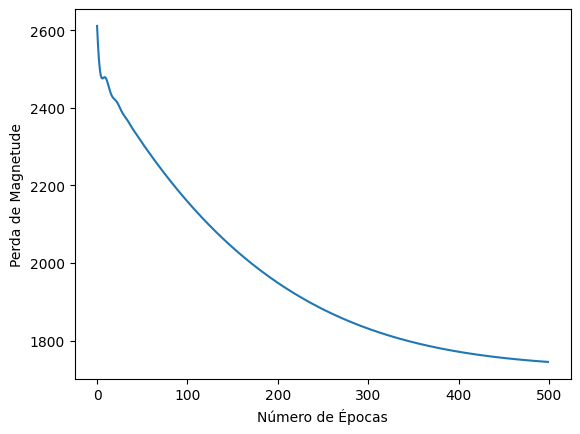

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("Número de Épocas")
plt.ylabel("Perda de Magnetude")
plt.plot(history.history['loss'])

## Use o modelo para prever valores

Agora você tem um modelo que foi treinado para aprender a relação entre `celsius_q` e `fahrenheit_a`. Você pode usar o método de previsão para calcular os graus Fahrenheit para graus Celsius anteriormente desconhecidos.

Então, por exemplo, se o valor Celsius for 100, qual você acha que será o resultado em Fahrenheit? Adivinhe antes de executar este código.

In [11]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 31ms/step
[[63.591824]]


A resposta correta é $100 \times 1,8 + 32 = 212$, então nosso modelo está indo muito bem.

### Recapitulando até aqui


* Criamos um modelo com uma camada Densa
* Treinamos com 3.500 exemplos (7 pares, mais de 500 épocas).

Nosso modelo ajustou as variáveis ​​(pesos) na camada Densa até ser capaz de retornar o valor Fahrenheit correto para qualquer valor Celsius. (Lembre-se, 100 Celsius não fazia parte dos nossos dados de treinamento.)

In [12]:
print("Estas são as variáveis: {}".format(l0.get_weights()))

Estas são as variáveis: [array([[0.30988064]], dtype=float32), array([32.60376], dtype=float32)]


A primeira variável está próxima de ~1,8 e a segunda de ~32. Esses valores (1,8 e 32) são as variáveis ​​reais na fórmula de conversão real.

Isso está muito próximo dos valores da fórmula de conversão. Explicaremos isso em um próximo vídeo, onde mostraremos como funciona uma camada Densa, mas para um único neurônio com uma única entrada e uma única saída, a matemática interna parece a mesma que [a equação de uma linha](https:/ /en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, que tem a mesma forma da equação de conversão, $f = 1,8c + 32$.

Como a forma é a mesma, as variáveis ​​deveriam convergir para os valores padrão de 1,8 e 32, e foi exatamente o que aconteceu.

Com neurônios adicionais, entradas adicionais e saídas adicionais, a fórmula se torna muito mais complexa, mas a ideia é a mesma.

### Uma pequena experiência

Só por diversão, e se criássemos camadas mais densas com unidades diferentes, que portanto também tivessem mais variáveis?

In [13]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Treinamento do modelo concluído")
print(model.predict([100.0]))
print("O modelo prevê que 100 graus Celsius é: {} graus Fahrenheit".format(model.predict([100.0])))
print("Estas são as variáveis ​​l0: {}".format(l0.get_weights()))
print("Estas são as variáveis ​​l1: {}".format(l1.get_weights()))
print("Estas são as variáveis ​​l2: {}".format(l2.get_weights()))

Treinamento do modelo concluído
1/1 [==============================] - 0s 26ms/step
[[53.593815]]
1/1 [==============================] - 0s 47ms/step
O modelo prevê que 100 graus Celsius é: [[53.593815]] graus Fahrenheit
Estas são as variáveis ​​l0: [array([[-0.32996625,  0.24325337, -0.24042048, -0.10088965]],
      dtype=float32), array([ 2.0658886 ,  3.3713686 ,  0.06658643, -3.2798233 ], dtype=float32)]
Estas são as variáveis ​​l1: [array([[-1.0445329e+00,  4.1966772e-01,  9.7267948e-02,  4.2285010e-01],
       [-7.1750391e-01,  2.8093854e-01, -1.0544617e+00,  3.5702994e-01],
       [-6.2294386e-02,  5.9857499e-02,  3.0487066e-04,  6.0696661e-01],
       [ 2.5867257e-02, -1.1636236e+00,  1.2745798e+00,  4.2493498e-01]],
      dtype=float32), array([-3.1185336,  2.7069206, -3.214838 , -0.710677 ], dtype=float32)]
Estas são as variáveis ​​l2: [array([[-1.734837  ],
       [ 1.1502129 ],
       [-1.0923264 ],
       [ 0.08283316]], dtype=float32), array([3.0522575], dtype=float32)]


Como você pode ver, este modelo também é capaz de prever muito bem o valor Fahrenheit correspondente. Mas quando você olha para as variáveis ​​(pesos) nas camadas `l0` e `l1`, elas não chegam nem perto de ~1,8 e ~32. A complexidade adicional esconde a forma “simples” da equação de conversão.

Fique ligado no próximo vídeo sobre como funcionam as camadas densas para obter a explicação.